# Метод стрельбы для задачи XI.9.2 б)

$y'' + \dfrac{y'^2}{2-y} = 0, 0 < x \leq 1$

$y(0) = y_0$, $y(1) = 0$

$y_0 = 0,25; 0,5; 1; 1,5; 1,8; 1,9; 1,95$

Сделаем замену t(x) = y'(x)

\begin{equation}
    \begin{cases}
      y' = t,\\
      t' = -\dfrac{t^2}{2-y},\\
	    y(0) = y_0,\\
      y(1) = 0
    \end{cases}
\end{equation}

## Решение методом стрельбы

Поставим новую задачу для метода стрельбы

$t(0) = \alpha$

Решим новую задачу Коши:

\begin{equation*}
    \begin{cases}
      y' = t,\\
      t' = -\dfrac{t^2}{2-y},\\
	    y(0) = y_0,\\
      t(0) = \alpha
    \end{cases}
\end{equation*}

Также составим задачу Коши для нахождения $F'(\alpha)$ (по книге Е.Н.Аристовой и А.И.Лобанова)

\begin{equation*}
    \begin{cases}
      u' = v,\\
      v' = -u\dfrac{t^2}{(y-2)^2} + 2v\dfrac{t}{y-2},\\
	    u(0) = 0,\\
      v(0) = 1
    \end{cases}
\end{equation*}

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Объявления переменных и функций

In [6]:
a = 1
h = 0.01
init_array = np.array([0.25, 0.5, 1, 1.5, 1.8, 1.9, 1.95])

def f_first(x, y):
    return np.array([y[1], -y[1]**2 / (2 - y[0])])

def f_second(v, x, y):
    return np.array([v[1], -(y[1]**2) / ((y[0] - 2)**2) * v[0] + 2 * y[1] / (y[0] - 2) * v[1]])

### Методы Рунге-Кутты, а также основная функция:

In [7]:
def rnk_first(x, y):
	k1 = f_first(x, y) * h
	k2 = f_first(x + h / 2, y + k1 / 2) * h
	k3 = f_first(x + h, y - k1 + 2 * k2) * h
	return (k1 + 4 * k2 + k3) / 6

def rnk_second(v, x, y):
	k1 = f_second(v, x, y) * h
	k2 = f_second(v + k1 / 2, x, y) * h
	k3 = f_second(v - k1 + 2 * k2, x, y) * h
	return (k1 + 4 * k2 + k3) / 6

def Newton(a_, y0):
    x = np.arange(0, 1, h)
    y = np.zeros((len(x), 2))
    v = np.zeros((len(x), 2))
    y[0] = np.array([y0, a_])
    v[0] = np.array([0, 1])

    for i in range(1, len(x)):
        y[i] = y[i - 1] + rnk_first(x[i - 1], y[i - 1])
        v[i] = v[i - 1] + rnk_second(v[i - 1], x[i - 1], y[i - 1])

    Func = y[-1][0]
    FuncDerive = v[-1][0]
    return a_ - Func/FuncDerive, x, y[:, 0]

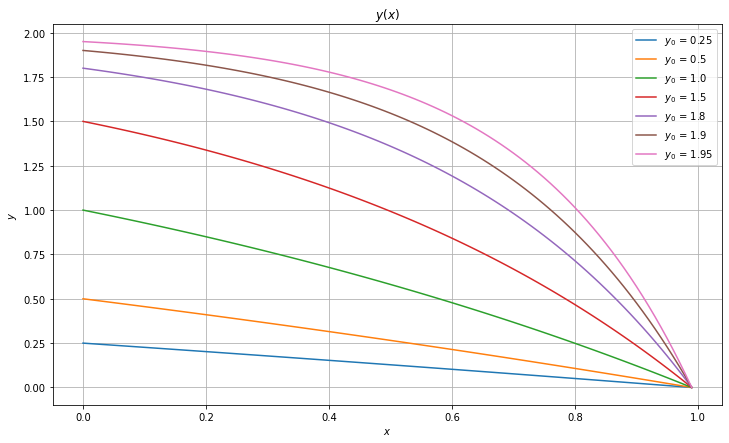

In [8]:
plt.figure(figsize=[12, 7])
plt.title('$y(x)$')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()

for i in init_array:
    while(True):
        n_a, x, sol = Newton(a, i)
        if(np.abs(n_a - a) < 1e-5):
            break
        a = n_a
    plt.plot(x, sol, '-', label=str('$y_0$ = ' + str(i)))

plt.legend()